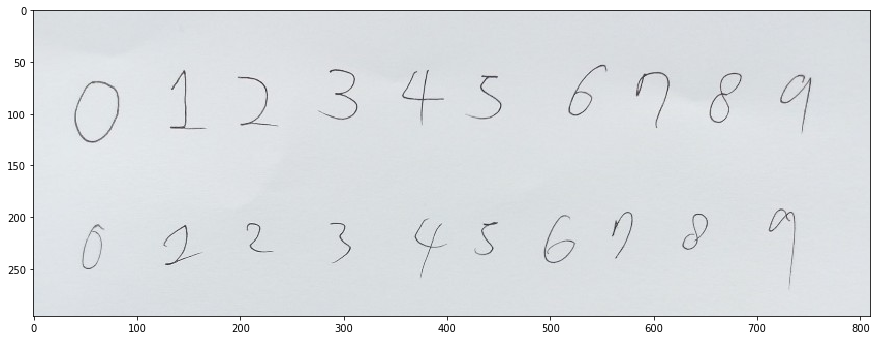

In [338]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('number_data/20.jpg')

plt.figure(figsize=(15,12))
plt.imshow(img)

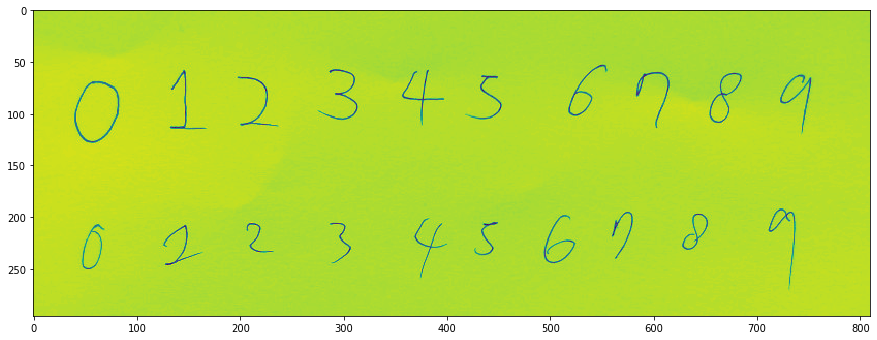

In [339]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,12))
plt.imshow(img_gray);

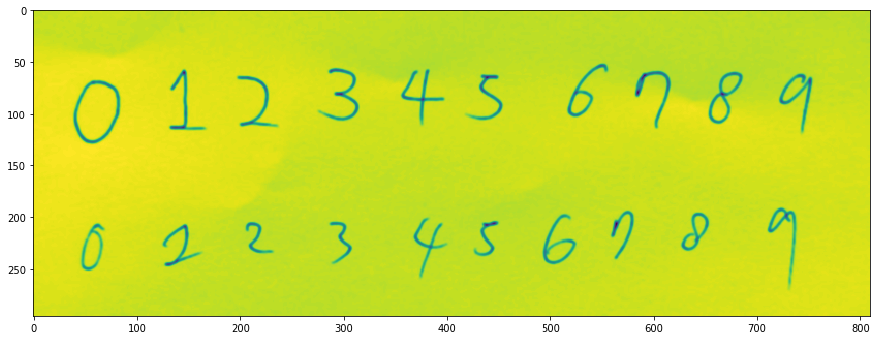

In [340]:
img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
plt.figure(figsize=(15,12))
plt.imshow(img_blur);

In [341]:
ret, img_th = cv2.threshold(img_blur, 200, 200, cv2.THRESH_BINARY_INV)

image, contours, hierachy= cv2.findContours(img_th.copy(), 
                                 cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

rects = [cv2.boundingRect(each) for each in contours]
print(len(rects))

22


In [342]:
tmp = [w*h for (x,y,w,h) in rects]
tmp.sort()
#tmp

In [343]:
rects = [(x,y,w,h) for (x,y,w,h) in rects if ((w*h>500)and(w*h<500000))]
print(len(rects))
rects

20


[(126, 207, 35, 41),
 (47, 207, 21, 45),
 (287, 205, 22, 40),
 (206, 205, 26, 30),
 (427, 204, 23, 34),
 (369, 202, 29, 56),
 (494, 197, 31, 49),
 (628, 196, 26, 37),
 (559, 194, 22, 47),
 (711, 191, 27, 56),
 (40, 68, 44, 61),
 (198, 64, 37, 48),
 (722, 62, 32, 55),
 (424, 62, 30, 44),
 (654, 60, 33, 50),
 (583, 59, 34, 55),
 (133, 58, 33, 58),
 (356, 57, 42, 52),
 (282, 56, 33, 51),
 (517, 52, 39, 51)]

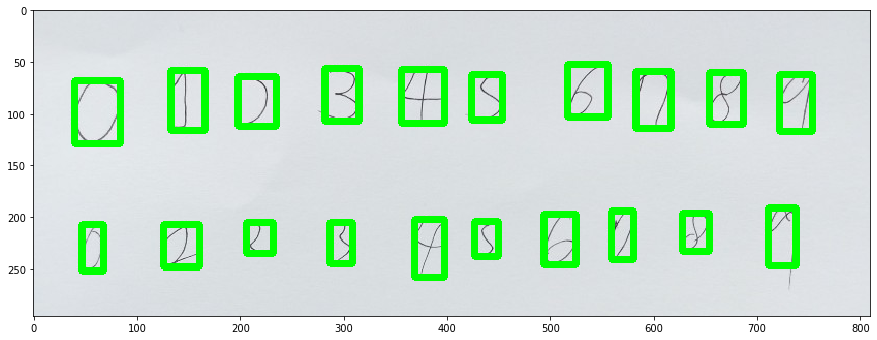

In [344]:
img_result = []
img_for_class = img.copy()
t_img = img.copy()

margin_pixel = 10

for rect in rects:
    #[y:y+h, x:x+w]
    img_result.append(
        img_for_class[rect[1]-margin_pixel : rect[1]+rect[3]+margin_pixel, 
                      rect[0]-margin_pixel : rect[0]+rect[2]+margin_pixel])
    
    # Draw the rectangles
    cv2.rectangle(t_img, (rect[0], rect[1]), 
                  (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 5) 

plt.figure(figsize=(15,12))
plt.imshow(t_img);

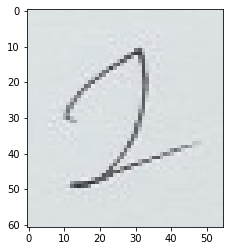

In [345]:
plt.imshow(img_result[0]);

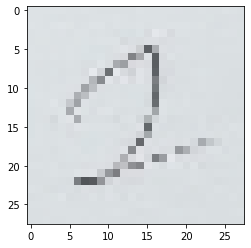

In [346]:
plt.imshow(cv2.resize(img_result[0], (28,28)));

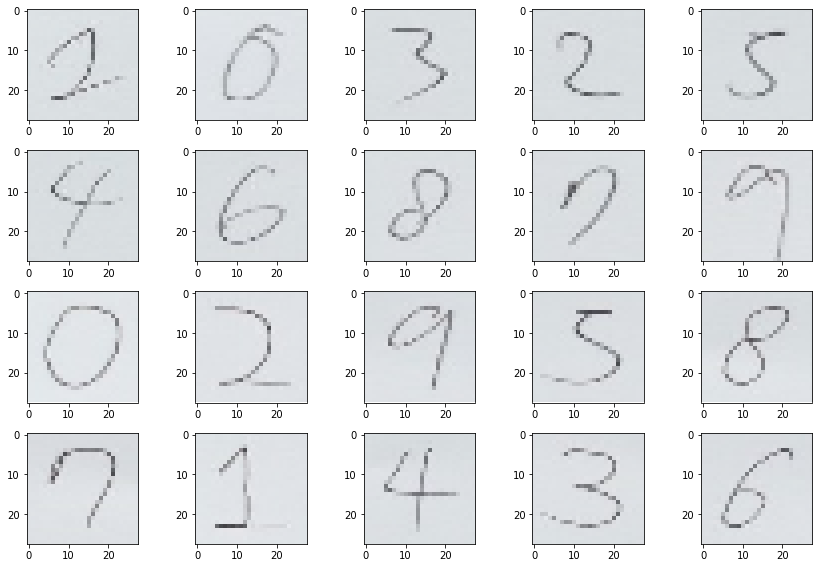

In [347]:
count = 0
nrows = 4
ncols = 5

plt.figure(figsize=(12,8))

for n in img_result:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(cv2.resize(n,(28,28)), cmap='Greys', interpolation='nearest')

plt.tight_layout()
plt.show()

In [348]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import tensorflow as tf
import keras

from keras.models import load_model
model = load_model('model/MNIST_CNN_model.h5')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              3137000   
__________

In [349]:
def num_to_mnist(num):
    M = np.ones(num.shape, dtype = "uint8") * 20 # 손 글씨 이미지가 어두워서 밝게 함
    num = cv2.add(num, M)   
    num = cv2.resize(num, (28,28), interpolation=cv2.INTER_AREA)[:,:,1]
    num = (num > 215) * num
    num = cv2.bitwise_not(num)
    num = num.astype('float32') / 255.
    return num

1/1 [==============================] - 0s
The Answer is  [1]


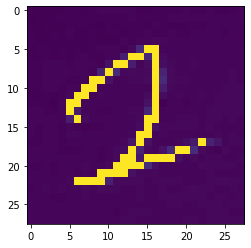

In [350]:
test_num = num_to_mnist(img_result[0])

#plt.imshow(test_num, cmap='Greys', interpolation='nearest');
plt.imshow(test_num)

test_num = test_num.reshape((1, 28, 28, 1))

print('The Answer is ', model.predict_classes(test_num))

1/1 [==============================] - 0s


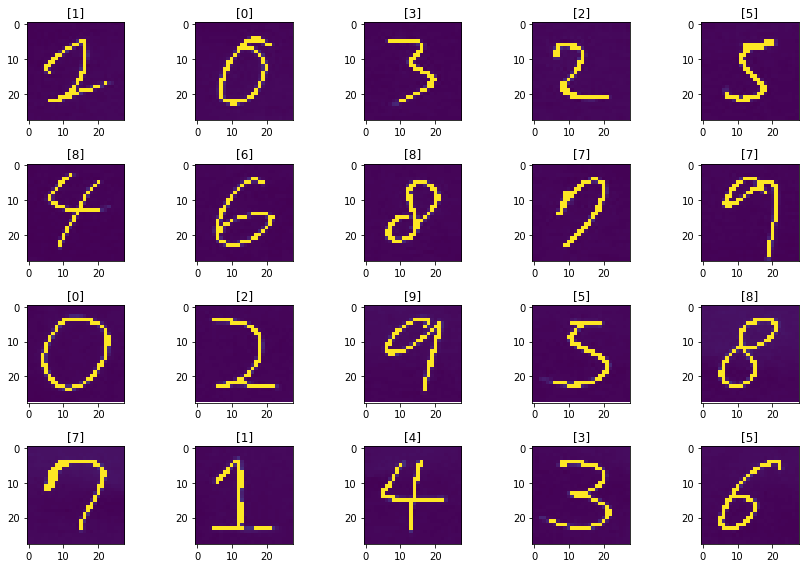

In [351]:
count = 0
nrows = 4
ncols = 5

plt.figure(figsize=(12,8))

for n in img_result:
    count += 1
    plt.subplot(nrows, ncols, count)
    test_num = num_to_mnist(n)
    plt.imshow(test_num)
    
    test_num = test_num.reshape((1, 28, 28, 1))
    plt.title(model.predict_classes(test_num))
    
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s


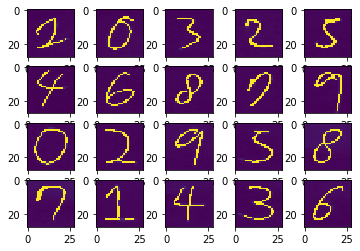

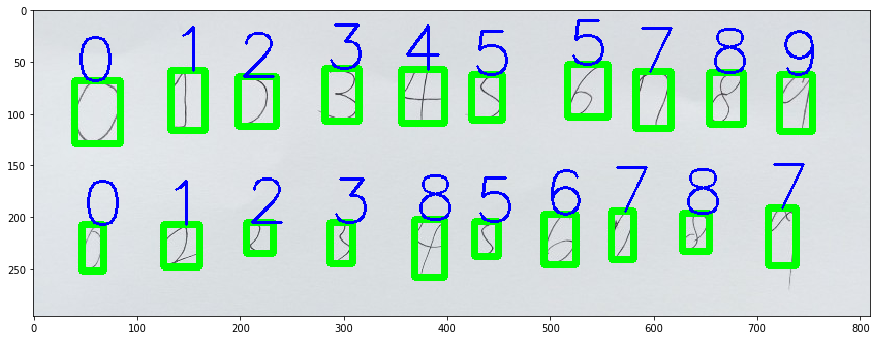

In [352]:
img_for_class = img.copy()
t_img = img.copy()

margin_pixel = 10
count = 0
for rect in rects:
    #[y:y+h, x:x+w]
    target_num = img_for_class[rect[1]-margin_pixel : rect[1]+rect[3]+margin_pixel,
                               rect[0]-margin_pixel : rect[0]+rect[2]+margin_pixel]
    test_num = num_to_mnist(target_num)
    
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(test_num)
    
    test_num = test_num.reshape((1, 28, 28, 1))
    predicted_num = model.predict_classes(test_num)
    # Draw the rectangles
    cv2.rectangle(t_img, (rect[0], rect[1]), 
                  (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 5) 
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(t_img, str(predicted_num[0]), (rect[0],rect[1]), font, 2, (0,0,255), 2)

plt.figure(figsize=(15,12))
plt.imshow(t_img);

In [353]:
cv2.imwrite("predict_ROI_number.jpg", t_img)

True